---   

# 숫자 손글씨 데이터 클러스터링
    - Q. 1 문제 : 숫자 손글씨 데이터 불러오기 및 전처리
    - Q. 2~4 문제 : 숫자 손글씨 데이터에 대한 클러스터링 문제 

- 작성자: 김태영 감수자

---

## Q. 1~4. 숫자 손글씨 데이터에 대한 클러스터링 문제

### 배경
클러스터링 파트에서는 수치 및 텍스트에 대한 여러가지 클러스터링 기법에 대해서 배워봤습니다. 이번 프로젝트에서는 이미지에 대해서 배운 클러스터링 기법을 활용해보도록 하겠습니다. 이미지는 가로 8픽셀, 세로 8픽셀로 구성된 64픽셀의 숫자손글씨를 사용합니다.

### 목표
숫자 손글씨 데이터 불러오기 및 전처리 수행한 후 3가지 클러스트링 기법을 적용해봅니다.
   - K-means clustering 수행
   - Hierarchical clustering 수행
   - DBSCAN 수행
---

### STEP 1. 숫자 손글씨 데이터 불러오기 및 전처리

숫자 손글씨 데이터를 불러와서 전처리를 수행합니다. 

* 숫자 손글씨 데이터는 sklearn에서 제공하는 load_digits() 함수를 통해서 불러옴
* 이미지 데이터를 변수 X에 저장
* X를 실수형으로 바꾼 후 정규화시켜 X의 값을 0.0과 1.0 사이의 수치로 바꿈
* 변수 X의 형식이 (1797, 64)인지 확인

In [1]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn.preprocessing import minmax_scale

digits = load_digits()
X = minmax_scale(digits.data, axis=0, copy=True)
y = digits.target
X.shape

(1797, 64)

In [2]:
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

### STEP 2. 숫자 손글씨에 대해서 K-means clustering 수행

숫자 손글씨 이미지에 대해서 KMeans 클러스터링을 수행합니다. 
* KMeans 옵션 중 n_clusters을 10으로 설정합니다. 

In [3]:
# KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 10, random_state=21)
km.fit_predict(X)

array([1, 0, 0, ..., 0, 7, 7])

아래는 숫자 손글씨 클러스터링 결과를 확인할 수 있는 가시화 함수입니다. 이 함수는 본 과정 평가와 무관하므로 제공합니다.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def viz_img(y_pred):
    n = 10
    fig = plt.figure(1)
    box_index = 1
    for cluster in range(10):
        result = np.where(y_pred == cluster)
        for i in np.random.choice(result[0].tolist(), n, replace=False):
            ax = fig.add_subplot(10, 10, box_index)
            plt.imshow(X[i].reshape(8, 8))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            box_index += 1
    plt.show()


라벨끼리 클러스터링이 잘 되어 있는 지 샘플링해서 눈으로 확인합니다.
* 클러스터링된 라벨은 km.labels_ 에 저장되어 있습니다.
* 상기 라벨을 viz_img 함수를 통해 가시화합니다.

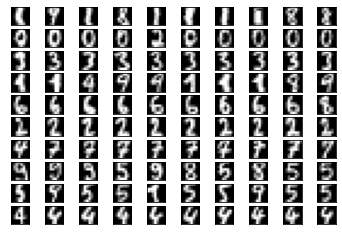

In [5]:
# viz_img
viz_img(km.labels_)

### STEP 3. 숫자 손글씨에 대해서 Hierarchical clustering 수행

숫자 손글씨 이미지에 대해서 Hierarchical clustering 클러스터링을 수행합니다. 
* linkage 함수를 이용하여 숫자 손글씨 이미지에 대해 계층적 군집화를 수행하여 linked 변수에 저장합니다.
* 군집한 결과(linked)를 dendrogram 함수를 이용하여 가시화를 수행합니다.
* 10개 클러스터로 계층적 군집화를 하기 위해 AgglomerativeClustering 함수를 이용합니다.

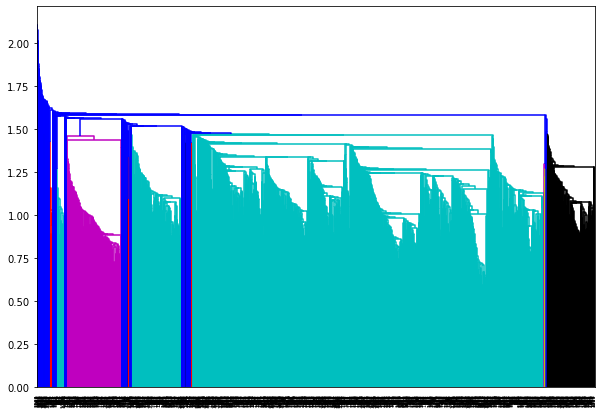

In [6]:
# linkage와 dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [7]:
# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([7, 9, 4, ..., 4, 0, 4], dtype=int64)

라벨끼리 클러스터링이 잘 되어 있는 지 샘플링해서 눈으로 확인합니다.
* 클러스터링된 라벨은 cluster.labels_ 에 저장되어 있습니다.
* 상기 라벨을 viz_img 함수를 통해 가시화합니다.

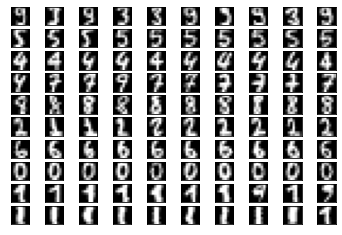

In [8]:
# viz_img
viz_img(cluster.labels_)

### STEP 4. 숫자 손글씨에 대해서 DBSCAN 수행

숫자 손글씨 이미지에 대해서 DBSCAN 클러스터링을 수행합니다. 
* DBSCAN 함수를 이용하여 숫자 손글씨 이미지에 대해 군집화를 수행하고 수행된 결과를 model 변수에 저장합니다.
* model.labels_ 최대값이 10이상 되도록 eps와 min_samples를 적절하게 설정해봅니다.

In [9]:
# DBSCAN
from sklearn.cluster import DBSCAN

In [10]:
# DBSCAN에서 알맞은 min_sample값과 eps구하기

for min_sample in [3, 5, 7, 9]:

    for eps in [0.2, 0.4, 0.9, 1, 3, 5, 7, 9, 11, 13, 15, 17]:

        model = DBSCAN(n_jobs=-1, min_samples=min_sample, eps=eps)

        model_pred = model.fit_predict(X)

        print('︎=== min_sample:{}, eps:{} ==='.format(min_sample, eps))

        print('')

        print('cluster 수: {}'.format(len(np.unique(model_pred))))

        print('cluster 크기: {}\n'.format(np.bincount(model_pred+1)))

        print('---------------------------------------')

︎=== min_sample:3, eps:0.2 ===

cluster 수: 1
cluster 크기: [1797]

---------------------------------------
︎=== min_sample:3, eps:0.4 ===

cluster 수: 1
cluster 크기: [1797]

---------------------------------------
︎=== min_sample:3, eps:0.9 ===

cluster 수: 45
cluster 크기: [1474   63    6    3   38    3   41    6    3    3    3    4    6    3
    5   15    5    3    7    3    4    4    3   12    3    4    4    5
    3    3    5    3    4    3    4    4    3    5    7    5    3    3
    3    3    3]

---------------------------------------
︎=== min_sample:3, eps:1 ===

cluster 수: 77
cluster 크기: [1128  106   19  118    4    3    9    6   25   53    8    5    4    7
    4    4    3    4   11    4   13    3    3    3    6    3    7    4
    7   15    6    4    7    5    5    5    3    3   18    3    4    3
    5    4    4    5    3    5    5    5    4    4    3    4    4    3
    5    3    5    3    3    5    3    3    5    6    3    3    7    4
    5    4    3    4    3    3    4]

------------

In [21]:
# min_sample:3, eps:1 일 경우 클러스터 77이 max
model = DBSCAN(min_samples=3, eps=1)
model.fit_predict(X)

array([ 0, -1, -1, ..., -1, -1, -1], dtype=int64)

라벨끼리 클러스터링이 잘 되어 있는 지 샘플링해서 눈으로 확인합니다.
* 클러스터링된 라벨은 model.labels_ 에 저장되어 있습니다.
* 상기 라벨을 viz_img 함수를 통해 가시화합니다.

ValueError: Cannot take a larger sample than population when 'replace=False'

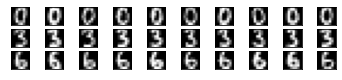

In [22]:
# viz_img
# 일부 데이터가 Error 가 나오는 이유를 잘 모르겠습니다.
viz_img(model.labels_)